# Cube generation and ploting

### Defining parameters 

### Utility Functions

In [189]:

import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the container dimensions
container_length = 20
container_width = 15
container_height = 10

# Initialize a list to store the cubes
cubes = []

# Initialize a list to store the positions of the cubes
cube_positions = []

# Define the valid range for cube dimensions
min_cube_length = 1
max_cube_length = 3
min_cube_width = 1
max_cube_width = 4
min_cube_height = 1
max_cube_height = 5


In [190]:
### Utility Functions
# Function to generate a random cube
def generate_random_cube():
    length = random.randint(min_cube_length, max_cube_length)
    width = random.randint(min_cube_width, max_cube_width)
    height = random.randint(min_cube_height, max_cube_height)
    return (length, width, height)

def assign_cube_positions(cube):
    if len(cube_positions):
        temp_pos = (cube_positions[-1][0]+cube[0],cube_positions[-1][1]+cube[1],cube_positions[-1][2]+cube[2])
        print(temp_pos)
        if container_length >= temp_pos[0]:
             cube_positions.append((cube[0],0,0))
             return
        elif container_width >= temp_pos[1]:
            cube_positions.append((0,cube[1],0))
            return
        else:#container_height >= temp_pos[2]):
            cube_positions.append((0,0,cube[3]))#cube_positions[-1][0]+
            return

    else:
        cube_positions.append((0, 0, 0))
        return

# Function to plot a cube

def plot_cube(ax, position, dimensions):

    vertices = [
        [(position[0], position[1], position[2]),
        (position[0] + dimensions[0], position[1], position[2]),
        (position[0] + dimensions[0], position[1] + dimensions[1], position[2]),
        (position[0], position[1] + dimensions[1], position[2]),
        (position[0], position[1], position[2] + dimensions[2]),
        (position[0] + dimensions[0], position[1], position[2] + dimensions[2]),
        (position[0] + dimensions[0], position[1] + dimensions[1], position[2] + dimensions[2]),
        (position[0], position[1] + dimensions[1], position[2] + dimensions[2])]
    ]

    faces = [
        [vertices[0][0], vertices[0][1], vertices[0][2], vertices[0][3]],
        [vertices[0][4], vertices[0][5], vertices[0][6], vertices[0][7]],
        [vertices[0][0], vertices[0][1], vertices[0][5], vertices[0][4]],
        [vertices[0][2], vertices[0][3], vertices[0][7], vertices[0][6]],
        [vertices[0][1], vertices[0][2], vertices[0][6], vertices[0][5]],
        [vertices[0][0], vertices[0][3], vertices[0][7], vertices[0][4]]
    ]

    ax.add_collection3d(Poly3DCollection(faces, linewidths=1, edgecolors='k', alpha=0.25))
# lastVertex=(0,0,0)
# def plot_cube(ax, position, dimensions):
#     global lastVertex
#     if all(i==0 for i in lastVertex):
#             vertices = [
#                 [(position[0], position[1], position[2]),
#                 (position[0] + dimensions[0], position[1], position[2]),
#                 (position[0] + dimensions[0], position[1] + dimensions[1], position[2]),
#                 (position[0], position[1] + dimensions[1], position[2]),
#                 (position[0], position[1], position[2] + dimensions[2]),
#                 (position[0] + dimensions[0], position[1], position[2] + dimensions[2]),
#                 (position[0] + dimensions[0], position[1] + dimensions[1], position[2] + dimensions[2]),
#                 (position[0], position[1] + dimensions[1], position[2] + dimensions[2])]
#             ]

#             faces = [
#                 [vertices[0][0], vertices[0][1], vertices[0][2], vertices[0][3]],
#                 [vertices[0][4], vertices[0][5], vertices[0][6], vertices[0][7]],
#                 [vertices[0][0], vertices[0][1], vertices[0][5], vertices[0][4]],
#                 [vertices[0][2], vertices[0][3], vertices[0][7], vertices[0][6]],
#                 [vertices[0][1], vertices[0][2], vertices[0][6], vertices[0][5]],
#                 [vertices[0][0], vertices[0][3], vertices[0][7], vertices[0][4]]
#             ]
#             print(vertices[-1][0])
#             lastVertex=vertices[-1][0]
#             print(f"[XXX]:{lastVertex}")
#             ax.add_collection3d(Poly3DCollection(faces, linewidths=1, edgecolors='k', alpha=0.25))
#     else:
#             position =tuple(x + y for x, y in zip(position, lastVertex))
#             vertices = [
#                 [(position[0], position[1], position[2]),
#                 (position[0] + dimensions[0], position[1], position[2]),
#                 (position[0] + dimensions[0], position[1] + dimensions[1], position[2]),
#                 (position[0], position[1] + dimensions[1], position[2]),
#                 (position[0], position[1], position[2] + dimensions[2]),
#                 (position[0] + dimensions[0], position[1], position[2] + dimensions[2]),
#                 (position[0] + dimensions[0], position[1] + dimensions[1], position[2] + dimensions[2]),
#                 (position[0], position[1] + dimensions[1], position[2] + dimensions[2])]
#             ]

#             faces = [
#                 [vertices[0][0], vertices[0][1], vertices[0][2], vertices[0][3]],
#                 [vertices[0][4], vertices[0][5], vertices[0][6], vertices[0][7]],
#                 [vertices[0][0], vertices[0][1], vertices[0][5], vertices[0][4]],
#                 [vertices[0][2], vertices[0][3], vertices[0][7], vertices[0][6]],
#                 [vertices[0][1], vertices[0][2], vertices[0][6], vertices[0][5]],
#                 [vertices[0][0], vertices[0][3], vertices[0][7], vertices[0][4]]
#             ]
#             lastVertex=vertices[-1][0]
#             print(f"[]:{lastVertex}")
#             ax.add_collection3d(Poly3DCollection(faces, linewidths=1, edgecolors='k', alpha=0.25))

## Main Block

In [191]:

# Iterate until the container is full
while True:
    # Generate a random cube
    cube = generate_random_cube()

    # Check if the cube fits within the container
    if (container_length >= cube[0] and
        container_width >= cube[1] and
        container_height >= cube[2]):
        cubes.append(cube)
        assign_cube_positions(cube)
        #cube_positions.append()
        container_length -= cube[0]
        container_width -= cube[1]
        container_height -= cube[2]
    else:
        break

# Plot the cubes
# for i, (cube, position) in enumerate(zip(cubes, cube_positions)):
#     print(f"Cube {i + 1}: Dimensions (LxWxH) = {cube[0]} x {cube[1]} x {cube[2]}, Position (x, y, z) = {position[0]} x {position[1]} x {position[2]}")
#     position_n =tuple(x + y for x, y in zip(position, cube))
#     print(f"[X_Pn]:{position_n}")
#     plot_cube(ax, position_n, cube)


(1, 3, 4)
(2, 4, 2)
(3, 1, 1)
(4, 1, 2)


Cube 1: Dimensions (LxWxH) = 1 x 4 x 1, Position (x, y, z) = 0 x 0 x 0
[X_Pn]:(0, 0, 0)
Cube 2: Dimensions (LxWxH) = 1 x 3 x 4, Position (x, y, z) = 1 x 0 x 0
[X]: (1, 0, 0)
Cube 3: Dimensions (LxWxH) = 1 x 4 x 2, Position (x, y, z) = 1 x 0 x 0
[X]: (2, 0, 0)
Cube 4: Dimensions (LxWxH) = 2 x 1 x 1, Position (x, y, z) = 2 x 0 x 0
[X]: (3, 0, 0)
Cube 5: Dimensions (LxWxH) = 2 x 1 x 2, Position (x, y, z) = 2 x 0 x 0
[X]: (5, 0, 0)


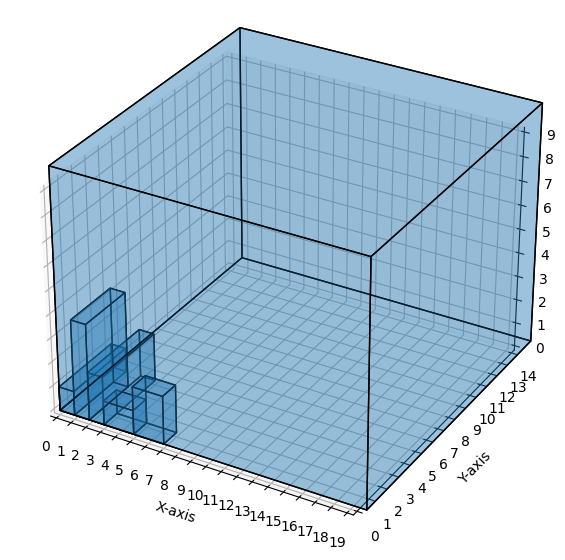

In [192]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

# Define the custom step sizes for each axis
x_step = 1
y_step = 1
z_step = 1

# Create the arrays for x, y, and z axes
x_values = np.arange(0, 20, x_step)
y_values = np.arange(0, 15, y_step)
z_values = np.arange(0, 10, z_step)

# Set the custom ranges for each axis
# ax.set_xlim(min(x_values), max(x_values))
# ax.set_ylim(min(y_values), max(y_values))
# ax.set_zlim(min(z_values), max(z_values))
ax.set_xlim(0, max(x_values))
ax.set_ylim(0, max(y_values))
ax.set_zlim(0, max(z_values))
#set ticks value
custom_x_ticks = np.arange(0, 20, x_step)
custom_y_ticks = np.arange(0, 15, x_step)
custom_z_ticks = np.arange(0, 10, x_step)
ax.set_xticks(custom_x_ticks)
ax.set_yticks(custom_y_ticks)
ax.set_zticks(custom_z_ticks)
# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

#plt.show()

plot_cube(ax, (0, 0, 0), (20, 15, 10))
for i, (cube, position) in enumerate(zip(cubes, cube_positions)):
    print(f"Cube {i + 1}: Dimensions (LxWxH) = {cube[0]} x {cube[1]} x {cube[2]}, Position (x, y, z) = {position[0]} x {position[1]} x {position[2]}")
    if i < 1:
        print(f"[X_Pn]:{position}")
        new_pos=(0,0,0)
        plot_cube(ax, new_pos, cube)
    else:
        new_pos = tuple((sum(tup[0] for tup in cubes[:i]),0,0))
        
        print(f"[X]: {new_pos}")
        plot_cube(ax,new_pos, cube)
        # if i==2:break




#new_pos= tuple(x + y for x, y in zip(cube_positions[i-1], position))
# for i, (cube, position) in enumerate(zip(cubes, cube_positions)):
#     print(f"Cube {i + 1}: Dimensions (LxWxH) = {cube[0]} x {cube[1]} x {cube[2]}, Position (x, y, z) = {position[0]} x {position[1]} x {position[2]}")
#     if i < 2:
#         print(f"[X_Pn]:{position}")
#         plot_cube(ax, position, cube)
#     else:

#         temp_pos = list(position)
#         temp_pos[0] = temp_pos[0]+cubes[i - 1][0]
#         position = tuple(temp_pos)
#         print(f"[X_Pn]:{position}")
#         plot_cube(ax, position, cube)

In [193]:
cubes

[(1, 4, 1), (1, 3, 4), (1, 4, 2), (2, 1, 1), (2, 1, 2)]

In [194]:
sum(tup[0] for tup in cubes[:2])
# tuple((sum((cubes[:i])),0,0))

2

In [195]:
tuple( for i in cubes[:2])

SyntaxError: invalid syntax (4168378463.py, line 1)